# DSE 220 - Homework 4 - Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, download the Brown corpus (using nltk.corpus). This is a collection of text samples from a wide range of sources, with a total of over a million words. Calling brown.words() returns this text in one long list, which is useful.

In [2]:
from nltk.corpus import brown
from nltk.corpus import stopwords

corpus = brown.words()
print(corpus)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


Remove stopwords and punctuation, make everything lowercase, and count how often each word occurs. 

In [3]:
# remove stopwords
stop = stopwords.words('english')
corpus = [w for w in corpus if w not in stop]

In [4]:
# remove punctuation
import string
table = str.maketrans({key: None for key in string.punctuation})
corpus = [w.translate(table) for w in corpus]

In [5]:
# make lowercase and remove blanks ('')
corpus = [w.lower() for w in corpus if w != '']

In [6]:
# make lowercase
#corpus = [w.lower() for w in corpus]

In [7]:
# count how often each word occurs
from collections import Counter
import string

counts = Counter()

for word in corpus:
    w = word.lower().translate(table)
    if w not in stop and w != '':
        counts[w] += 1

In [8]:
# print counts
counts

Counter({'fulton': 17,
         'county': 155,
         'grand': 48,
         'jury': 67,
         'said': 1961,
         'friday': 60,
         'investigation': 51,
         'atlantas': 4,
         'recent': 179,
         'primary': 96,
         'election': 77,
         'produced': 90,
         'evidence': 204,
         'irregularities': 8,
         'took': 426,
         'place': 570,
         'termend': 1,
         'presentments': 1,
         'city': 393,
         'executive': 55,
         'committee': 168,
         'overall': 47,
         'charge': 122,
         'deserves': 16,
         'praise': 17,
         'thanks': 37,
         'atlanta': 35,
         'manner': 124,
         'conducted': 55,
         'septemberoctober': 1,
         'term': 79,
         'charged': 57,
         'superior': 46,
         'court': 230,
         'judge': 77,
         'durwood': 1,
         'pye': 1,
         'investigate': 11,
         'reports': 84,
         'possible': 374,
         'hardfought': 2,

Use this to come up with two lists:
* A vocabulary V , consisting of a few thousand (e.g., 5000) of the most commonly-occurring words.
* A shorter list C of at most 1000 of the most commonly-occurring words, which we shall call context words.

In [9]:
V_len = 5000
C_len = 1000

V = [w for (w,c) in counts.most_common(V_len)]
C = [w for (w,c) in counts.most_common(C_len)]

print('length of V =',len(V),'\nlength of C =',len(C))

length of V = 5000 
length of C = 1000


For each word w ∈ V , and each occurrence of it in the text stream, look at the surrounding window of four words (two before, two after):
$$
w_1\ \ w_2\ \ w\ \ w_3\ \ w_4.
$$

Keep count of how often context words from $C$ appear in these positions around word $w$. That is, for $w \in V$, $c \in C$, define

$$
n(w, c) = \text{# of times c occurs in a window around }w.
$$

Using these counts, construct the probability distribution $Pr(c \lvert w)$ of context words around $w$ (for each $w \in V$), as well as the overall distribution $Pr(c)$ of context words. These are distributions over $C$.

In [10]:
# create empty context count matrix
c_count_mtx = np.array([np.zeros(len(C)) for _ in range(len(V))])

# define window range = how many words before/after in which to look for context words
window_range = 2

# loop through words in vocabulary V
max_idx = len(corpus)
for i in range(len(V)):
    word = V[i]
    # find locations in corpus where each word in V occurs
    word_locs = np.where(np.array(corpus) == word)[0]
    
    # loop through indices where word in V occurs
    for idx in word_locs:
        # create list of words within window range
        pre = [corpus[x] for x in range(idx-window_range, idx) if x>0]
        post = [corpus[x] for x in range(idx+1, idx+window_range+1) if x<max_idx]
        neighbors = np.concatenate([pre, post])
        
        # loop through context words
        for j in range(len(C)):
            if C[j] in neighbors:
                c_count_mtx[i,j] += 1

In [11]:
# check s_count_mtx shape
print('c_count_mtx shape:',c_count_mtx.shape)

print('\nc_count_mtx:')
print(c_count_mtx)

c_count_mtx shape: (5000, 1000)

c_count_mtx:
[[ 67.  71.  41. ...,   1.   1.   4.]
 [ 71.  42.  62. ...,   2.   1.   3.]
 [ 39.  60.  19. ...,   1.   3.   1.]
 ..., 
 [  0.   0.   0. ...,   0.   0.   0.]
 [  1.   1.   0. ...,   0.   0.   0.]
 [  0.   0.   1. ...,   0.   0.   0.]]


In [12]:
c_count_mtx

array([[ 67.,  71.,  41., ...,   1.,   1.,   4.],
       [ 71.,  42.,  62., ...,   2.,   1.,   3.],
       [ 39.,  60.,  19., ...,   1.,   3.,   1.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.]])

In [13]:
# calculate row, column, and total sum of c_count_mtx
row_sums = np.sum(c_count_mtx, axis=1)
print('row_sums shape:',row_sums.shape)

col_sums = np.sum(c_count_mtx, axis=0)
print('col_sums shape:',col_sums.shape)

total_sum = np.sum(c_count_mtx)
print('total_sum =',total_sum)

# calculate probabilities
pr_c = col_sums / total_sum
pr_c_given_w = np.divide(c_count_mtx.T, row_sums).T

# check shape of probabilities
print('\npr_c shape:',pr_c.shape)
print('pr_c_given_w shape:',pr_c_given_w.shape)

row_sums shape: (5000,)
col_sums shape: (1000,)
total_sum = 668247.0

pr_c shape: (1000,)
pr_c_given_w shape: (5000, 1000)


Represent each vocabulary item w by a $\lvert C \lvert$-dimensional vector $\Phi(w)$, whose c’th coordinate is:
$$\Phi(w) = max(0, log \cfrac{Pr(c \lvert w)}{Pr(c)}$$
This is known as the (positive) pointwise mutual information, and has been quite successful in work on word embedding. (20 marks)

In [14]:
# calculate log of probability ratios
with np.errstate(divide='ignore'):
    phi = np.log10(np.divide(pr_c_given_w,pr_c))

# replace negative values with 0
phi[phi < 0] = 0

# check shape of phi
print('phi shape:',phi.shape)

phi shape: (5000, 1000)


Suppose we want a 100-dimensional representation. How would you achieve this?

In [15]:
# reduce dimensionality using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=100)
phi_100 = pca.fit_transform(phi)

# verify shape
print('phi_100 shape:',phi_100.shape)

phi_100 shape: (5000, 100)


Investigate the resulting embedding in two ways:
* Cluster the vocabulary into 100 clusters. Look them over; do they seem completely random, or is there some sense to them?
* Try finding the nearest neighbor of selected words. Do the answers make sense?

### Clustering Analysis

In [47]:
# fit phi using kmeans with 100 clusters
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=100, algorithm='full')
k_means.fit(phi_100);

In [48]:
# extract labels
labels = k_means.labels_

# create a dictionary of words in each cluster
cluster_dict = {}
for i in range(0,100):
    clust = np.where(labels == i)[0]
    cluster_dict['cluster '+str(i)] = []
    for c in clust:
        cluster_dict['cluster '+str(i)].append(V[c])

In [49]:
# check some dictionary entries
for i in range(100):
    print('cluster '+str(i)+':\n',cluster_dict['cluster '+str(i)],'\n')

cluster 0:
 ['beautiful', 'strange', 'sight', 'naked'] 

cluster 1:
 ['make', 'take', 'enough', 'find', 'give', 'help', 'money', 'keep', 'job', 'run', 'play', 'longer', 'call', 'hold', 'care', 'bring', 'start', 'answer', 'meet', 'stand', 'decided', 'neither', 'understand', 'ask', 'stay', 'speak', 'expect', 'write', 'reach', 'exactly', 'fight', 'follow', 'giving', 'pass', 'check', 'break', 'build', 'begin', 'impossible', 'learn', 'fair', 'secret', 'send', 'buy', 'realize', 'escape', 'explain', 'grow', 'imagine', 'eat', 'notice', 'advance', 'remove', 'avoid', 'lose', 'draw', 'win', 'catch', 'throw', 'sell', 'afford', 'decide'] 

cluster 2:
 ['communism', 'stories', 'detective', 'strike', 'grand', 'testimony', 'superior', 'weakness', 'prime', 'slaves', 'discovery', 'agent', 'republic', 'prison', 'nineteenth', 'bound', 'distinguished', 'opposed', 'virtually', 'whereas', 'mystery', 'feature', 'release', 'occasional', 'mixed', 'error', 'paintings', 'classic', 'nationalism', 'prepare', 'abstr

In [50]:
# inertia plot
n_list = np.arange(1,101,1)
inertia = []
for n in n_list:
    k_means = KMeans(n_clusters=n) 
    k_means.fit(phi_100)
    inertia.append(k_means.inertia_)

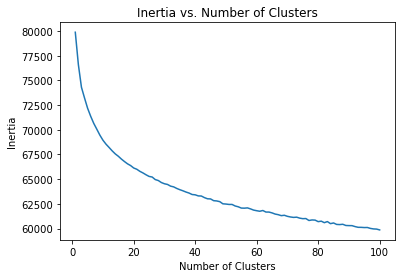

In [51]:
plt.plot(n_list, inertia)
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

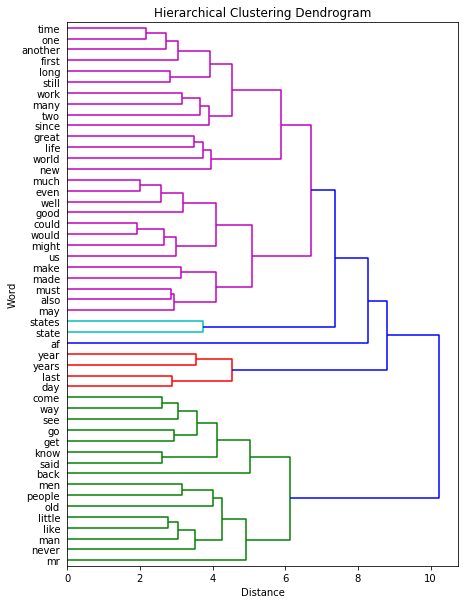

In [60]:
# perform heirarchical clustering on some selected words
from scipy.cluster.hierarchy import dendrogram, linkage
num_words = 50
data = phi_100[:num_words]
Z = linkage(data, 'ward')

'''
from pylab import rcParams
rcParams['figure.figsize'] = 5,10
'''

# plot dendrogram
plt.figure(figsize=(7, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Word')
plt.xlabel('Distance')
dendrogram(Z, orientation='right',labels=V[:num_words])
plt.tick_params(axis='y', labelsize=10)
plt.show()

## Nearest Neighbor Analysis

In [53]:
# calculate nearest neighbor of words in vocabulary
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2, algorithm='brute', metric='cosine')
nn.fit(phi_100)

# extract distances and index of nearest neighbors
distances, indices = nn.kneighbors(phi_100)

In [54]:
# print nearest neighbor for some words in vocabulary
for i in range(40,60):
    dist = distances[i][1]
    ind = indices[i][1]
    word = V[i]
    nearest = V[ind]
    print(word,'/',nearest,'/ distance = %.3f' % dist)

know / think / distance = 0.140
last / next / distance = 0.289
might / would / distance = 0.303
great / social / distance = 0.471
old / boy / distance = 0.342
year / 1960 / distance = 0.259
states / united / distance = 0.158
come / go / distance = 0.305
since / however / distance = 0.500
go / leave / distance = 0.261
came / went / distance = 0.267
right / thats / distance = 0.288
used / use / distance = 0.308
take / get / distance = 0.257
three / four / distance = 0.163
house / back / distance = 0.271
use / used / distance = 0.308
without / mind / distance = 0.357
place / bed / distance = 0.468
american / national / distance = 0.419


In [55]:
# find nearest neighbor for some specific words
words = ['communism', 'autumn', 'cigarette', 'pulmonary', 'mankind', 
         'africa', 'chicago', 'revolution', 'september', 'chemical', 
         'detergent', 'dictionary', 'storm', 'worship', 'house', 
         'three', 'american', 'industry', 'police', 'congress', 
         'talk', 'story', 'freedom', 'beautiful', 'british']

for word in words:
    idx = np.where(np.array(V) == word)[0][0]
    dist = distances[idx][1]
    ind = indices[idx][1]
    nearest = V[ind]
    print(word,'/',nearest,'/ distance = %.3f' % dist)

communism / utopian / distance = 0.549
autumn / summer / distance = 0.493
cigarette / lighted / distance = 0.480
pulmonary / artery / distance = 0.260
mankind / world / distance = 0.526
africa / asia / distance = 0.348
chicago / portland / distance = 0.429
revolution / modern / distance = 0.627
september / july / distance = 0.251
chemical / drugs / distance = 0.438
detergent / drying / distance = 0.506
dictionary / text / distance = 0.267
storm / wedding / distance = 0.485
worship / christian / distance = 0.526
house / back / distance = 0.271
three / four / distance = 0.163
american / national / distance = 0.419
industry / business / distance = 0.378
police / station / distance = 0.477
congress / federal / distance = 0.396
talk / tell / distance = 0.328
story / always / distance = 0.540
freedom / justice / distance = 0.448
beautiful / like / distance = 0.337
british / american / distance = 0.526


In [56]:
# find closest words
neigh_dists = np.array([x[1] for x in distances])
min_neigh_dists = np.sort(neigh_dists)[:20:2]
min_neighbors = []
for m in min_neigh_dists:
    min_neighbors.append(np.where(neigh_dists == m)[0][0])

print('closest pairs of words:')
for mn in min_neighbors:
    dist = distances[mn][1]
    ind = indices[mn][1]
    word = V[mn]
    nearest = V[ind]
    print(word,'/',nearest,'/ distance = %.3f' % dist)

closest pairs of words:
puerto / rico / distance = 0.070
per / cent / distance = 0.123
1 / 2 / distance = 0.137
know / think / distance = 0.140
f / l / distance = 0.145
q / tangent / distance = 0.145
lo / shu / distance = 0.146
zg / tangent / distance = 0.147
said / im / distance = 0.153
tell / know / distance = 0.154
